In [101]:
import numpy as np

# Load the NPZ file
data = np.load('../output.npz')

# View all array names in the file
print("Arrays in the file:", list(data.keys()))

# Access individual arrays
array1 = data['windows']  # Replace with actual array name
print("Shape:", array1.shape)
print("Data type:", array1.dtype)

Arrays in the file: ['windows', 'mean_pose', 'num_windows', 'window_size', 'overlap', 'fps', 'num_joints', 'features_per_frame']
Shape: (203, 160, 63)
Data type: float64


In [102]:
print(array1)

[[[ 0.00000000e+00  1.73573063e+00  0.00000000e+00 ... -2.87922766e-01
   -8.55504748e-02 -4.86816881e-02]
  [ 0.00000000e+00  1.74864232e+00  0.00000000e+00 ... -2.87922766e-01
    1.05748227e-01 -6.39525844e-01]
  [ 0.00000000e+00  1.74334102e+00  0.00000000e+00 ...  2.22584932e+01
    9.48280694e-01 -6.21720649e-01]
  ...
  [ 0.00000000e+00  1.06421894e+00  0.00000000e+00 ...  1.04578123e+01
    5.48501473e-01  5.09668961e-01]
  [ 0.00000000e+00  1.06538907e+00  0.00000000e+00 ... -3.09199311e+01
    1.82852123e-01 -1.31434935e-01]
  [ 0.00000000e+00  1.04100206e+00  0.00000000e+00 ...  5.25856628e+01
   -3.19400852e-02  4.48500130e-01]]

 [[ 0.00000000e+00  1.49303712e+00  0.00000000e+00 ...  4.66238555e-01
   -2.97606996e+00  1.39669494e+00]
  [ 0.00000000e+00  1.55262803e+00  0.00000000e+00 ... -2.29824865e+00
   -2.60009593e+00  1.42696766e+00]
  [ 0.00000000e+00  1.58151764e+00  0.00000000e+00 ... -7.68057291e-01
   -2.30566736e+00  1.30240922e+00]
  ...
  [ 0.00000000e+00  6.7

In [103]:
array1.shape

(203, 160, 63)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [105]:
windows = data['windows']
mean_pose = data['mean_pose']

In [106]:
print(f"Data shape: {windows.shape}")
print(f"Number of windows: {windows.shape[0]}")
print(f"Window size (frames): {windows.shape[1]}")
print(f"Features per frame: {windows.shape[2]}")

Data shape: (203, 160, 63)
Number of windows: 203
Window size (frames): 160
Features per frame: 63


In [107]:
print(f"\nData statistics:")
print(f"Min value: {windows.min():.4f}")
print(f"Max value: {windows.max():.4f}")
print(f"Mean: {windows.mean():.4f}")
print(f"Std: {windows.std():.4f}")


Data statistics:
Min value: -94.2429
Max value: 93.9244
Mean: -0.0000
Std: 2.4311


In [108]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

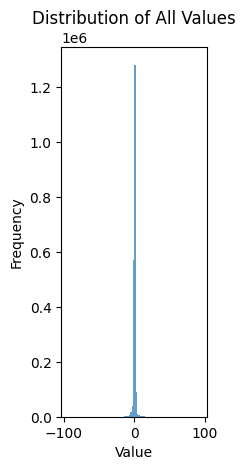

In [109]:
plt.subplot(1, 3, 1)
plt.hist(windows.flatten(), bins=100, alpha=0.7)
plt.title('Distribution of All Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Mean Value')

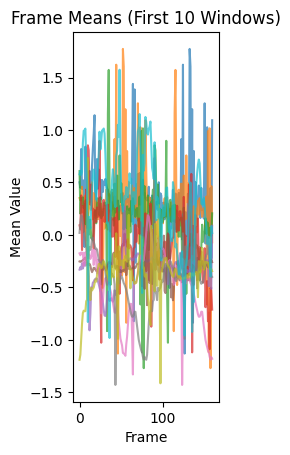

In [110]:
plt.subplot(1, 3, 2)
frame_means = windows.mean(axis=2)
plt.plot(frame_means[:10].T, alpha=0.7)
plt.title('Frame Means (First 10 Windows)')
plt.xlabel('Frame')
plt.ylabel('Mean Value')

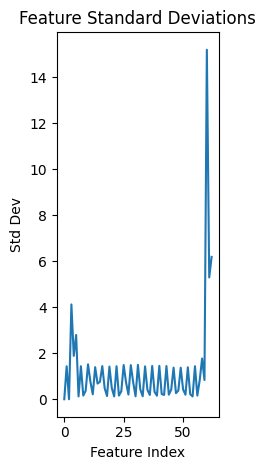

In [111]:
plt.subplot(1, 3, 3)
feature_stds = windows.std(axis=(0, 1))
plt.plot(feature_stds)
plt.title('Feature Standard Deviations')
plt.xlabel('Feature Index')
plt.ylabel('Std Dev')
plt.tight_layout()
plt.show()

In [112]:
joint_features = windows[:, :, :60]  # 20 joints × 3 coords = 60 features
velocity_features = windows[:, :, 60:]  # Last 3 features (y_rot_vel, x_trans_vel, z_trans_vel)

print(f"\nJoint positions shape: {joint_features.shape}")
print(f"Velocity features shape: {velocity_features.shape}")


Joint positions shape: (203, 160, 60)
Velocity features shape: (203, 160, 3)


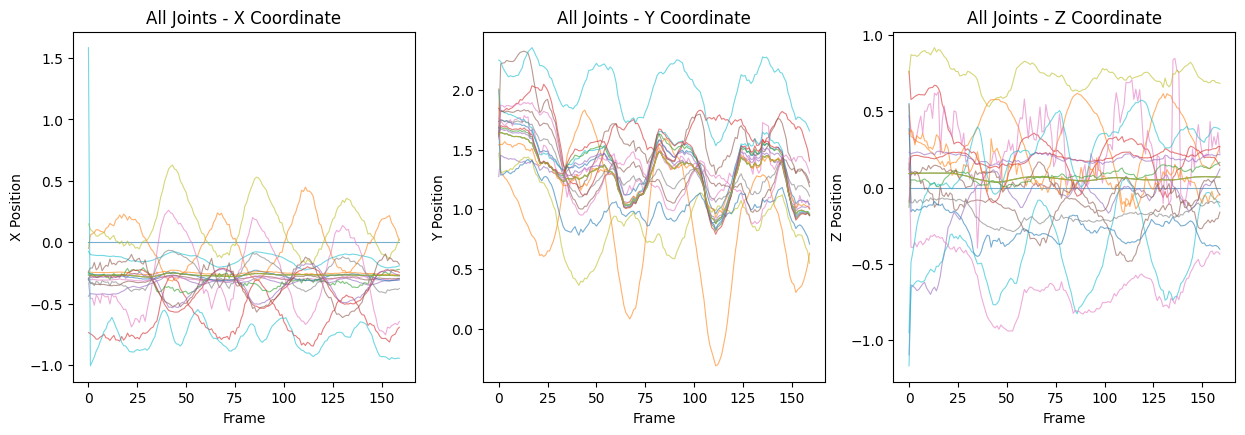

In [113]:
# Visualize joint positions for one window
window_idx = 0
joint_data = joint_features[window_idx]  # Shape: (160, 60)

# Reshape to (160, 20, 3) for easier visualization
joint_positions = joint_data.reshape(160, 20, 3)

plt.figure(figsize=(15, 10))

# Plot X, Y, Z coordinates for all joints over time
for coord_idx, coord_name in enumerate(['X', 'Y', 'Z']):
    plt.subplot(2, 3, coord_idx + 1)
    for joint_idx in range(20):
        plt.plot(joint_positions[:, joint_idx, coord_idx], alpha=0.6, linewidth=0.8)
    plt.title(f'All Joints - {coord_name} Coordinate')
    plt.xlabel('Frame')
    plt.ylabel(f'{coord_name} Position')

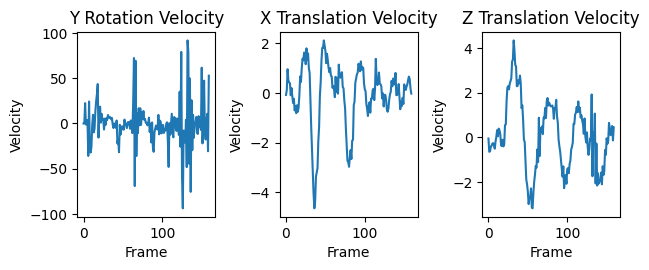

In [114]:
# Plot velocity features
velocity_data = velocity_features[window_idx]  # Shape: (160, 3)
velocity_names = ['Y Rotation Velocity', 'X Translation Velocity', 'Z Translation Velocity']

for vel_idx, vel_name in enumerate(velocity_names):
    plt.subplot(2, 3, vel_idx + 4)
    plt.plot(velocity_data[:, vel_idx])
    plt.title(vel_name)
    plt.xlabel('Frame')
    plt.ylabel('Velocity')

plt.tight_layout()
plt.show()

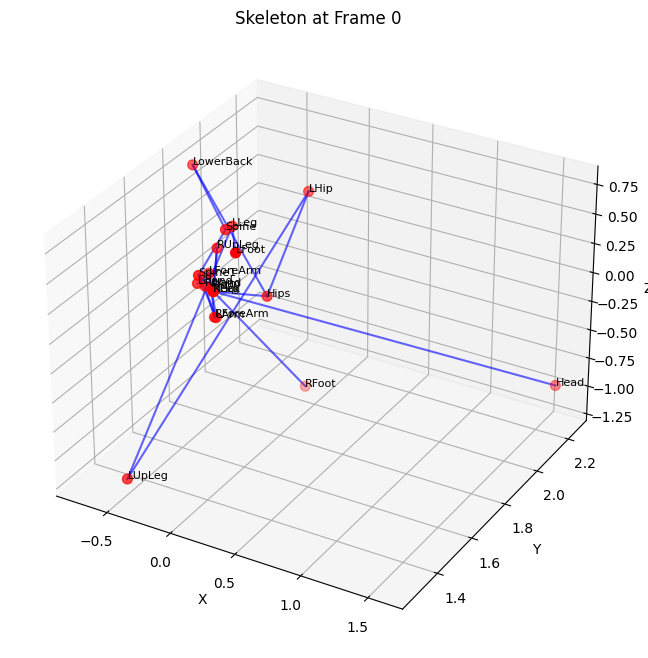

In [115]:
# 3D visualization of one frame
def plot_skeleton_3d(joint_positions, frame_idx=0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    positions = joint_positions[frame_idx].reshape(20, 3)
    
    # Plot joints as points
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=50, c='red')
    
    # Add joint labels
    joint_names = [
        'Hips', 'LHip', 'RHip', 'LowerBack',
        'LUpLeg', 'RUpLeg', 'LLeg', 'RLeg',
        'LFoot', 'RFoot', 'Spine', 'Spine1',
        'LArm', 'RArm', 'LForeArm', 'RForeArm',
        'LHand', 'RHand', 'Neck', 'Head'
    ]
    
    for i, name in enumerate(joint_names[:len(positions)]):
        ax.text(positions[i, 0], positions[i, 1], positions[i, 2], name, fontsize=8)
    
    # Basic skeleton connections (simplified)
    connections = [
        (0, 3), (3, 10), (10, 11), (11, 18), (18, 19),  # spine
        (0, 1), (1, 4), (4, 6), (6, 8),  # left leg
        (0, 2), (2, 5), (5, 7), (7, 9),  # right leg
        (11, 12), (12, 14), (14, 16),    # left arm
        (11, 13), (13, 15), (15, 17),    # right arm
    ]
    
    for start, end in connections:
        if start < len(positions) and end < len(positions):
            ax.plot([positions[start, 0], positions[end, 0]],
                   [positions[start, 1], positions[end, 1]],
                   [positions[start, 2], positions[end, 2]], 'b-', alpha=0.6)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Skeleton at Frame {frame_idx}')
    plt.show()

# Plot skeleton for first frame
plot_skeleton_3d(joint_positions, frame_idx=0)

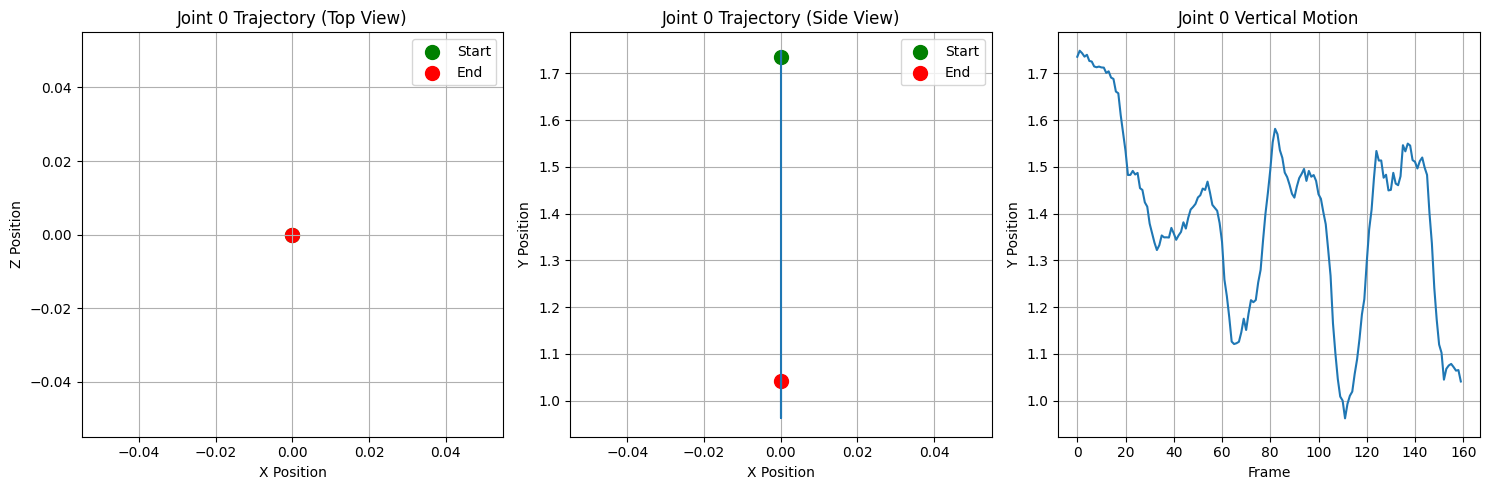

In [116]:

# Motion trajectory visualization
def plot_motion_trajectory(joint_positions, joint_idx=0):
    plt.figure(figsize=(15, 5))
    
    trajectory = joint_positions[:, joint_idx, :]  # Shape: (160, 3)
    
    plt.subplot(1, 3, 1)
    plt.plot(trajectory[:, 0], trajectory[:, 2])  # X-Z plane (top view)
    plt.scatter(trajectory[0, 0], trajectory[0, 2], c='green', s=100, label='Start')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 2], c='red', s=100, label='End')
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Joint {joint_idx} Trajectory (Top View)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(trajectory[:, 0], trajectory[:, 1])  # X-Y plane (side view)
    plt.scatter(trajectory[0, 0], trajectory[0, 1], c='green', s=100, label='Start')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='red', s=100, label='End')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Joint {joint_idx} Trajectory (Side View)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.plot(range(160), trajectory[:, 1])  # Y over time
    plt.xlabel('Frame')
    plt.ylabel('Y Position')
    plt.title(f'Joint {joint_idx} Vertical Motion')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot trajectory for hip joint (index 0)
plot_motion_trajectory(joint_positions, joint_idx=0)


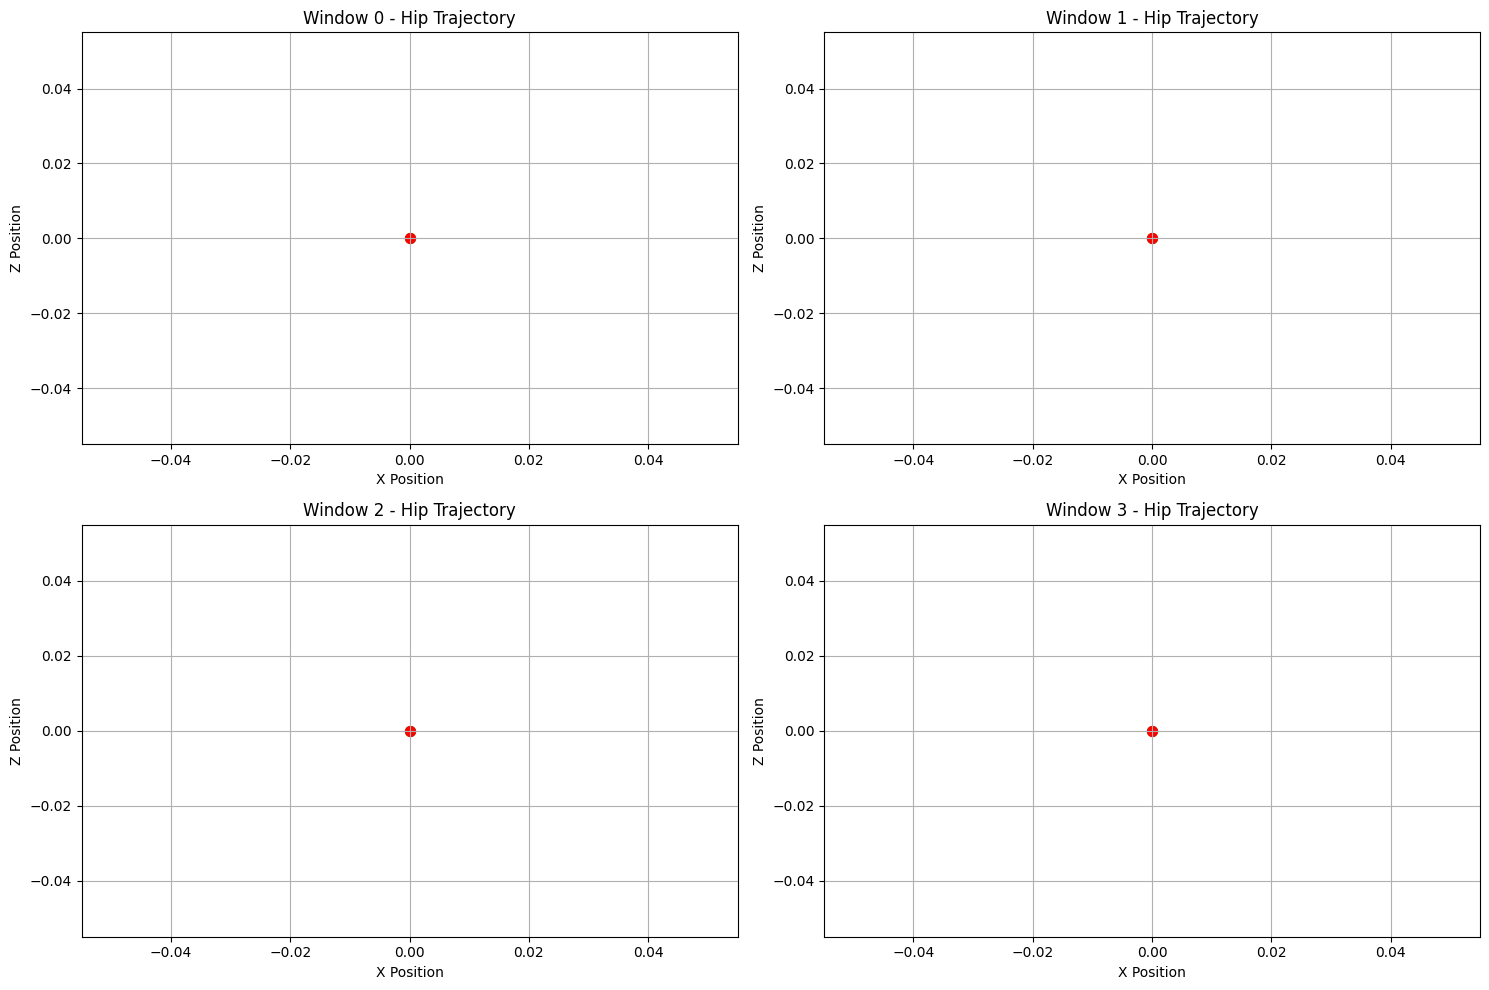

C:\Users\user\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\user\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


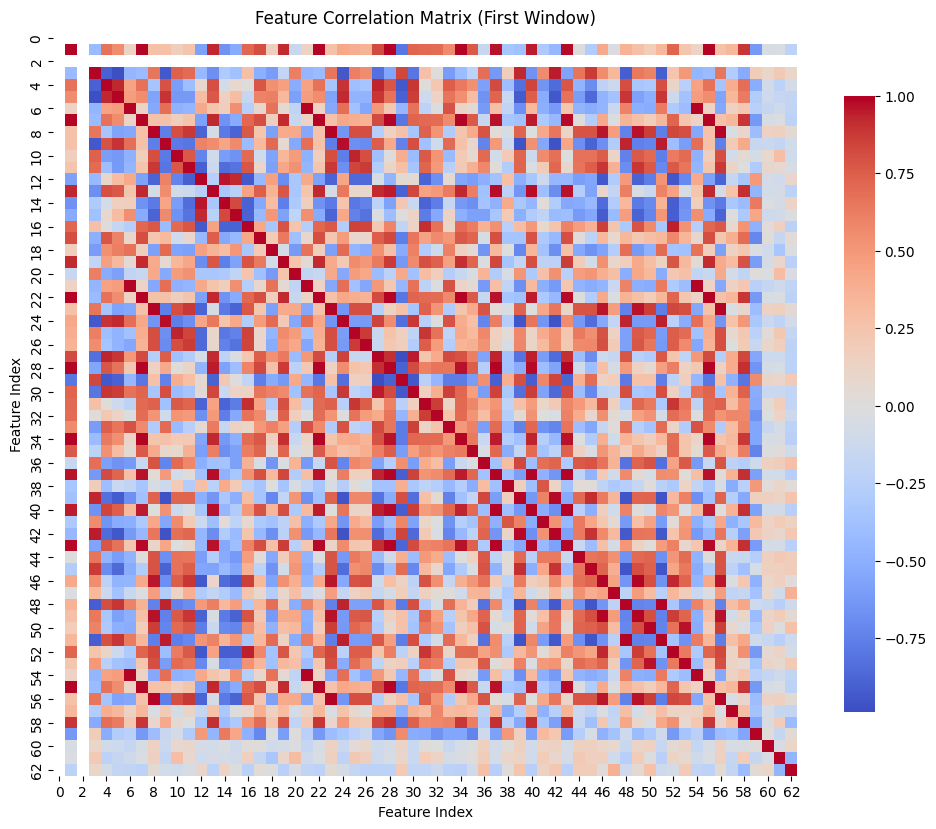

In [117]:

# Compare multiple windows
def compare_windows(windows, indices=[0, 1, 2, 3]):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, window_idx in enumerate(indices):
        if window_idx < len(windows):
            # Plot first joint's trajectory for each window
            joint_data = windows[window_idx, :, :60].reshape(160, 20, 3)
            trajectory = joint_data[:, 0, :]  # Hip joint
            
            ax = axes[i]
            ax.plot(trajectory[:, 0], trajectory[:, 2], alpha=0.8)
            ax.scatter(trajectory[0, 0], trajectory[0, 2], c='green', s=50)
            ax.scatter(trajectory[-1, 0], trajectory[-1, 2], c='red', s=50)
            ax.set_title(f'Window {window_idx} - Hip Trajectory')
            ax.set_xlabel('X Position')
            ax.set_ylabel('Z Position')
            ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Compare first 4 windows
compare_windows(windows, [0, 1, 2, 3])

# Feature correlation heatmap
sample_window = windows[0]  # Take first window
correlation_matrix = np.corrcoef(sample_window.T)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix (First Window)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.show()



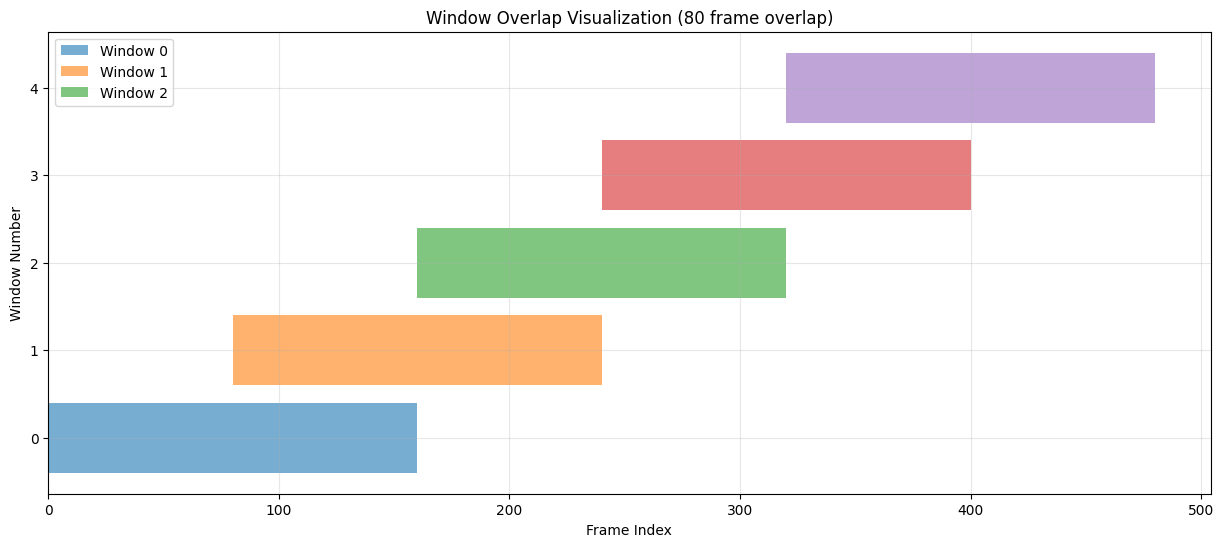

Window boundaries:
Window 0: frames 0 to 159
Window 1: frames 80 to 239
Window 2: frames 160 to 319
Window 3: frames 240 to 399
Window 4: frames 320 to 479

Data successfully loaded and visualized!
Total windows: 203
Each window: 160 frames × 63 features
Features: 60 joint positions + 3 velocity components


In [118]:
# Window overlap visualization
def visualize_overlap():
    plt.figure(figsize=(15, 6))
    
    # Show how windows overlap
    window_starts = []
    window_ends = []
    for i in range(5):  # Show first 5 windows
        start = i * 80  # Step size = window_size - overlap = 160 - 80 = 80
        end = start + 160
        window_starts.append(start)
        window_ends.append(end)
        
        plt.barh(i, 160, left=start, height=0.8, alpha=0.6, 
                label=f'Window {i}' if i < 3 else "")
    
    plt.xlabel('Frame Index')
    plt.ylabel('Window Number')
    plt.title('Window Overlap Visualization (80 frame overlap)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("Window boundaries:")
    for i in range(5):
        print(f"Window {i}: frames {window_starts[i]} to {window_ends[i]-1}")

visualize_overlap()

print(f"\nData successfully loaded and visualized!")
print(f"Total windows: {len(windows)}")
print(f"Each window: 160 frames × 63 features")
print(f"Features: 60 joint positions + 3 velocity components")

25